In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
x, y = make_classification(n_samples = 2000, n_classes = 2, weights = [1,1], random_state = 1)

In [3]:
x.shape

(2000, 20)

In [4]:
y.shape

(2000,)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 20)
(600, 20)
(1400,)
(600,)


In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Using Random forests

In [20]:
## Apply randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
ytrain_pred = rf_model.predict_proba(x_train)
print("RF train roc-auc : {}".format(roc_auc_score(y_train, ytrain_pred[:, 1])))
y_test_pred = rf_model.predict_proba(x_test)
print("RF test roc-auc : {}".format(roc_auc_score(y_test, y_test_pred[:, 1])))

RF train roc-auc : 1.0
RF test roc-auc : 0.983061111111111


### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
ytrain_pred = log_model.predict_proba(x_train)
print("RF train roc-auc : {}".format(roc_auc_score(y_train, ytrain_pred[:, 1])))
y_test_pred = log_model.predict_proba(x_test)
print("RF test roc-auc : {}".format(roc_auc_score(y_test, y_test_pred[:, 1])))

RF train roc-auc : 0.9863568922694498
RF test roc-auc : 0.9885777777777777


### AdaBoost Classifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(x_train, y_train)
ytrain_pred = ada_model.predict_proba(x_train)
print("RF train roc-auc : {}".format(roc_auc_score(y_train, ytrain_pred[:, 1])))
y_test_pred = ada_model.predict_proba(x_test)
print("RF test roc-auc : {}".format(roc_auc_score(y_test, y_test_pred[:, 1])))

RF train roc-auc : 0.9975081174960356
RF test roc-auc : 0.9826111111111111


### KNN Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
ytrain_pred = knn_model.predict_proba(x_train)
print("RF train roc-auc : {}".format(roc_auc_score(y_train, ytrain_pred[:, 1])))
y_test_pred = knn_model.predict_proba(x_test)
print("RF test roc-auc : {}".format(roc_auc_score(y_test, y_test_pred[:, 1])))

RF train roc-auc : 0.981670071491109
RF test roc-auc : 0.9426111111111111


### Selecting the best threshold value for maximum accuracy

In [37]:
pred = []
for model in [rf_model, log_model, ada_model, knn_model]:
    pred.append(pd.Series(model.predict_proba(x_test)[:, 1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test, final_prediction)))

Ensemble test roc-auc: 0.9850222222222222


In [38]:
 pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.97,0.966929,0.538202,0.8
3,0.96,0.761539,0.509875,0.8
4,0.57,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.00,0.000003,0.441377,0.0
597,0.96,0.984385,0.532403,1.0
598,0.02,0.001147,0.441720,0.2


In [54]:
final_prediction

0      0.882762
1      0.115823
2      0.818783
3      0.757853
4      0.559947
         ...   
595    0.121340
596    0.110345
597    0.869197
598    0.165717
599    0.837357
Length: 600, dtype: float64

In [42]:
### Calculate the roc_curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90674686, 0.90577475, 0.80493823,
       0.8030558 , 0.79949934, 0.79912833, 0.78498136, 0.78321156,
       0.76124415, 0.76037124, 0.73641018, 0.73387362, 0.69975181,
       0.69643711, 0.65942282, 0.65743537, 0.61212652, 0.60864346,
       0.6015152 , 0.59736186, 0.57827749, 0.57550386, 0.56792732,
       0.56675354, 0.55994674, 0.55139283, 0.54838469, 0.54719563,
       0.54399047, 0.54127948, 0.52355932, 0.50866892, 0.4621034 ,
       0.45222765, 0.44700602, 0.37975652, 0.35336612, 0.23969741,
       0.23890421, 0.22755139, 0.22396893, 0.19781109, 0.19598417,
       0.12570026, 0.1253351 , 0.10695344])

In [44]:
from sklearn.metrics import accuracy_score
accur_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction > thres, 1, 0)
    accur_ls.append(accuracy_score(y_test, y_pred, normalize = True))
    
accur_ls = pd.concat([pd.Series(thresholds), pd.Series(accur_ls)], axis = 1)
accur_ls.columns = ['thresholds','accuracy']
accur_ls.sort_values(by='accuracy', ascending = False, inplace = True)
accur_ls.head()

,thresholds,accuracy
35,0.452228,0.961667
36,0.447006,0.960000
34,0.462103,0.960000
33,0.508669,0.958333
32,0.523559,0.956667


In [52]:
def roc_auc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver operating charestics (ROC) curve')
    plt.legend()
    plt.show()

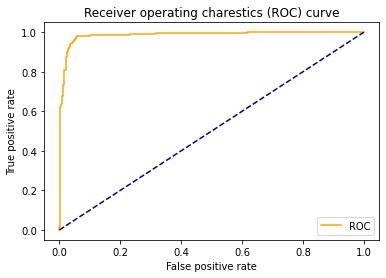

In [53]:
roc_auc_curve(fpr, tpr)